In [19]:
import tensorflow as tf
from tensorflow.keras import layers, datasets, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [20]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

In [21]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [42]:
classe = ["airplane", "automobile", "bird", "cat", "dear", "dog", "frog", "horse", "ship", "truck"]

In [43]:
def plot_sample(x, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classe[y[index]])




In [24]:
x_train = x_train/255
x_test = x_test/255

In [29]:
ann = models.Sequential([
                         layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape = (32, 32, 3)),
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu"),
                         layers.MaxPooling2D((2,2)),
                         layers.Flatten(input_shape = (32, 32, 3)),
                         layers.Dense(3000, activation="relu"),
                         layers.Dense(10, activation="softmax")

                         
                         
])

ann.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ann.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 127s 81ms/step - loss: 1.3564 - accuracy: 0.5153
Epoch 2/10
1563/1563 [==============================] - 124s 79ms/step - loss: 0.9684 - accuracy: 0.6593
Epoch 3/10
1563/1563 [==============================] - 121s 78ms/step - loss: 0.7659 - accuracy: 0.7306
Epoch 4/10
1563/1563 [==============================] - 124s 79ms/step - loss: 0.5733 - accuracy: 0.8004
Epoch 5/10
1563/1563 [==============================] - 122s 78ms/step - loss: 0.3863 - accuracy: 0.8664
Epoch 6/10
1563/1563 [==============================] - 124s 80ms/step - loss: 0.2311 - accuracy: 0.9231
Epoch 7/10
1563/1563 [==============================] - 119s 76ms/step - loss: 0.1496 - accuracy: 0.9502
Epoch 8/10
1563/1563 [==============================] - 123s 79ms/step - loss: 0.1092 - accuracy: 0.9634
Epoch 9/10
1563/1563 [==============================] - 123s 79ms/step - loss: 0.0887 - accuracy: 0.9712
Epoch 10/10
1563/1563 [==============================] 

In [31]:
ann.evaluate(x_test, y_test)

313/313 [==============================] - 6s 19ms/step - loss: 1.6464 - accuracy: 0.7088


[1.6464165449142456, 0.7088000178337097]

In [32]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

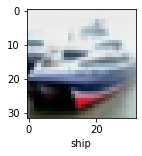

In [36]:
plot_sample(x_test,y_test, 1)

In [38]:
y_pred = ann.predict(x_test)
y_pred

array([[9.76795178e-09, 3.88110918e-03, 1.01418387e-04, ...,
        5.35136314e-06, 2.43736067e-05, 1.27337685e-07],
       [2.03732234e-05, 4.71312046e-01, 1.42107395e-14, ...,
        3.37663154e-24, 5.28667629e-01, 2.09635544e-08],
       [7.80673372e-03, 2.15804443e-01, 8.19262932e-05, ...,
        1.78414304e-03, 6.68541849e-01, 1.04169600e-01],
       ...,
       [2.02515650e-14, 2.48485754e-19, 1.84390992e-05, ...,
        5.39255268e-07, 2.34972286e-23, 2.36373692e-13],
       [2.57033389e-03, 4.15137500e-01, 1.01058302e-03, ...,
        2.00234851e-09, 1.58693036e-09, 8.66529717e-06],
       [9.33837901e-19, 6.43478533e-20, 1.19024990e-16, ...,
        1.00000000e+00, 4.83786507e-22, 1.06405623e-22]], dtype=float32)

In [39]:
y_classes = [np.argmax(element) for element in y_pred]

In [40]:
y_classes[:5]

[3, 8, 8, 0, 4]

In [45]:
classe[y_classes[3]]

'airplane'